# Import Packages

In [1]:
!pip install --upgrade tensorflow keras
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import keras
from tqdm import tqdm

In [2]:
class_names = ['minor','moderate','severe','NORMAL']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [3]:
def car_insurance():
    if (pred_labels==1):
        print("insurance: Based on the damaged for moderate car insurance is $1500 to $3000")
    elif (pred_labels==2):
        print("insurance:Based on the damaged for severe car insurance is $3000 to $5000")
    elif (pred_labels==0):
        print("insurance:Based on the damaged for minor car insurance is $500 to $1500")
    else:
        print("NO INSURANCE")

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [4]:
def load_data():

    datasets = ['C:/Users/badit/OneDrive/Documents/carinsurance-cnn-flask/train', 'C:/Users/badit/OneDrive/Documents/carinsurance-cnn-flask/test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Users/badit/OneDrive/Documents/carinsurance-cnn-flask/train


100%|███████████████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 386.64it/s]


Loading C:/Users/badit/OneDrive/Documents/carinsurance-cnn-flask/test


100%|███████████████████████████████████████████████████████████████████████████████| 468/468 [00:01<00:00, 339.20it/s]


In [6]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [7]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 2303
Number of testing examples: 2303
Each image is of size: (150, 150)


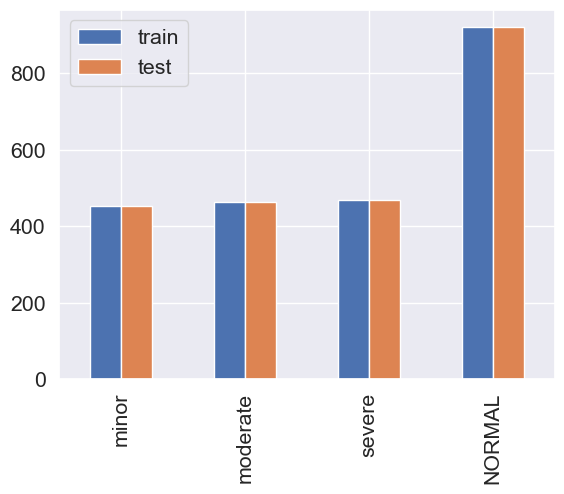

In [8]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

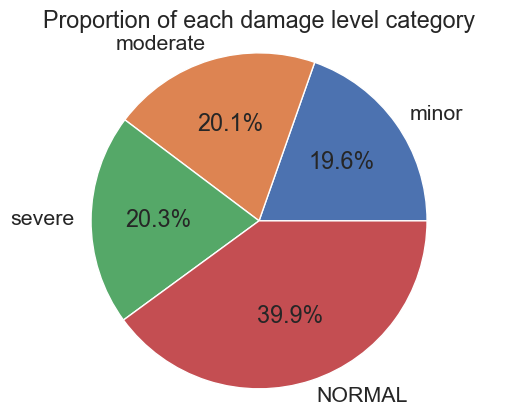

In [9]:
plt.pie(train_counts,
        explode=(0, 0, 0 ,0) ,
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each damage level category')
plt.show()

## Good practice: scale the data

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Visualize the data
We can display a random image from the training set.

In [11]:
def display_random_image(class_names, images, labels):


    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

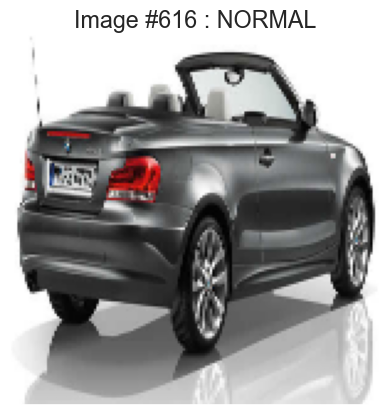

In [12]:
display_random_image(class_names, train_images, train_labels)

In [13]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(30):
        plt.subplot(6,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

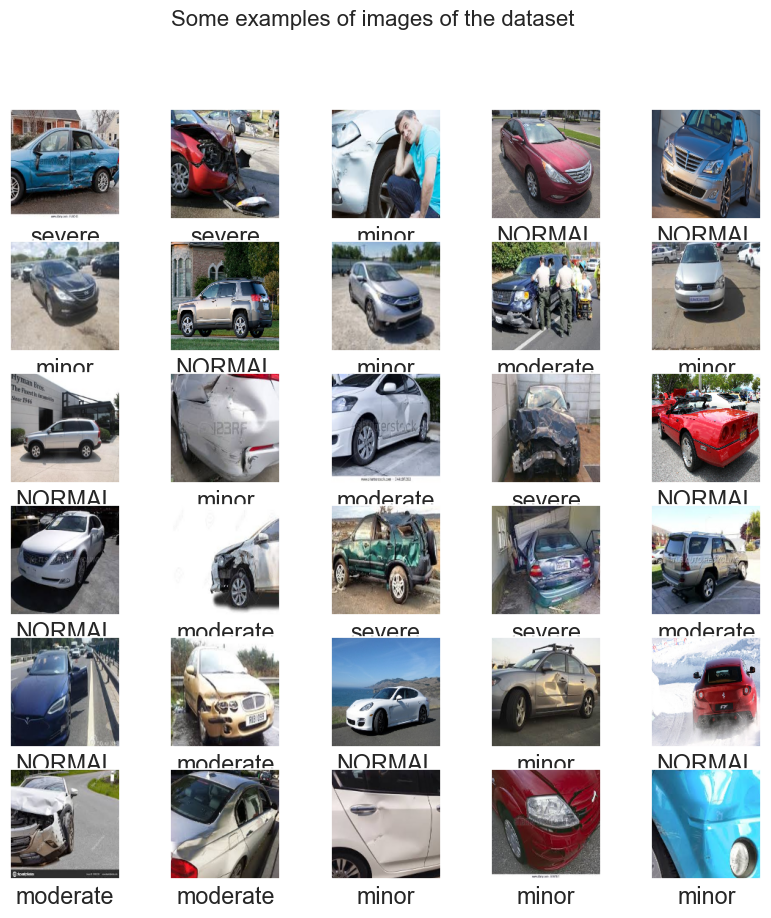

In [14]:
display_examples(class_names, train_images, train_labels)

In [15]:
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

C:\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,319,204 (20.29 MB)

 Trainable params: 5,319,204 (20.29 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
cnn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
r = cnn_model.fit(train_images,train_labels, batch_size=125, epochs=25, validation_split = 0.2)

Epoch 1/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.2666 - loss: 2.6537 - val_accuracy: 0.3991 - val_loss: 1.3214
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4020 - loss: 1.2640 - val_accuracy: 0.4121 - val_loss: 1.1962
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5004 - loss: 1.0877 - val_accuracy: 0.5271 - val_loss: 1.0911
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.6507 - loss: 0.8739 - val_accuracy: 0.5466 - val_loss: 1.0990
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7736 - loss: 0.6598 - val_accuracy: 0.5141 - val_loss: 1.2225
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.8617 - loss: 0.4971 - val_accuracy: 0.5597 - val_loss: 1.2099
Epoch 7/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9012 - loss: 0.3343 - val_accuracy: 0.5401 - val_loss: 1.2905
Epoch 8/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9384 - loss: 0.2565 - val_accuracy: 0.5206 - val_loss:

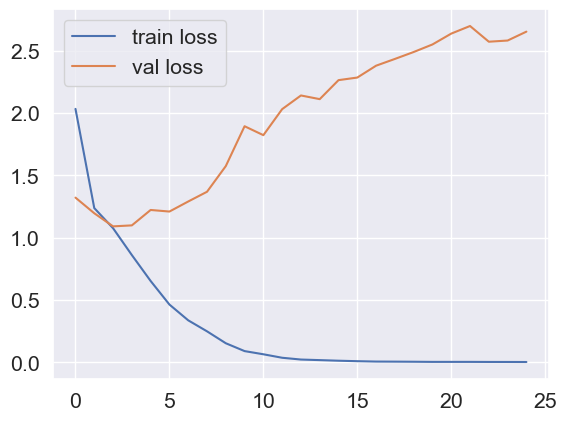

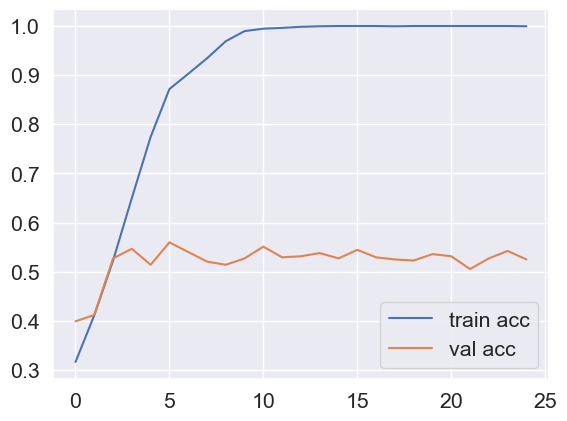

<Figure size 640x480 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
test_loss = cnn_model.evaluate(test_images, test_labels)

72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.8807 - loss: 0.6924


72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step


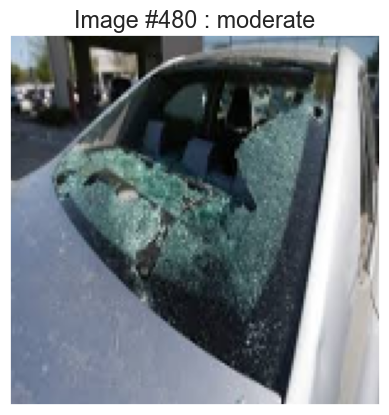

In [21]:
predictions = cnn_model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability


index = np.random.randint(test_images.shape[0])
plt.figure()
plt.imshow(test_images[index])
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

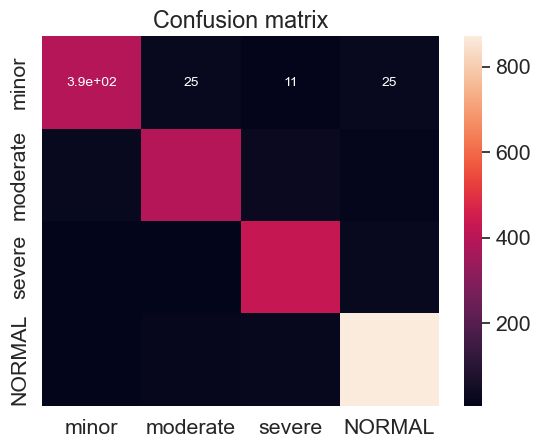

In [22]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[0]
insurance:Based on the damaged for minor car insurance is $500 to $1500


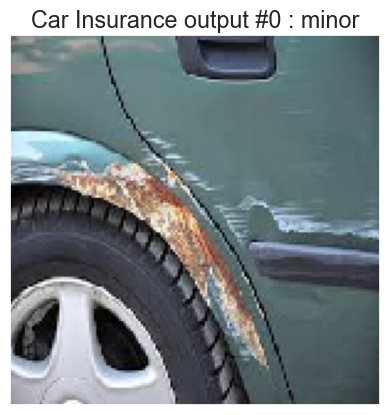

In [23]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:/Users/badit/OneDrive/Documents/carinsurance-cnn-flask/test/minor/0018.jpeg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = cnn_model.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
print(pred_labels )
car_insurance()
index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Car Insurance output #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

In [24]:
cnn_model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [25]:
brand_names = ['AUDI','BMW','TOYOTA']
brand_names_label = {brand_name:i for i, brand_name in enumerate(brand_names)}

nb_brands = len(brand_names)

IMAGE_SIZE = (150, 150)

In [26]:
def brand_insurance():
    if (pred_labels==0):
        print("insurance: Based on the damaged for AUDI car insurance is $2500 to $3000")
    elif (pred_labels==1):
        print("insurance:Based on the damaged for BMW car insurance is $3000 to $5000")
    else:
        print("insurance:Based on the damaged for TOYOTO car insurance is $500 to $1500")

In [27]:
def load_data():

    datasets = ['C:/Users/badit/OneDrive/Documents/carinsurance-cnn-flask/brand_train', 'C:/Users/badit/OneDrive/Documents/carinsurance-cnn-flask/brand_test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = brand_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [28]:
(brandtrain_images, brandtrain_labels), (brandtest_images, brandtest_labels) = load_data()

Loading C:/Users/badit/OneDrive/Documents/carinsurance-cnn-flask/brand_train


100%|███████████████████████████████████████████████████████████████████████████████| 260/260 [00:02<00:00, 113.34it/s]


Loading C:/Users/badit/OneDrive/Documents/carinsurance-cnn-flask/brand_test


100%|███████████████████████████████████████████████████████████████████████████████| 260/260 [00:01<00:00, 155.67it/s]


In [29]:
brandtrain_images, brandtrain_labels = shuffle(brandtrain_images, brandtrain_labels, random_state=25)

In [30]:
n1_train = brandtrain_labels.shape[0]
n1_test = brandtest_labels.shape[0]

print ("Number of training examples: {}".format(n1_train))
print ("Number of testing examples: {}".format(n1_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 793
Number of testing examples: 793
Each image is of size: (150, 150)


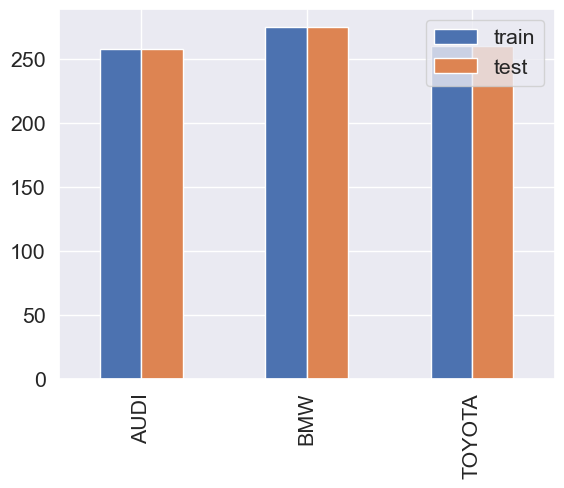

In [31]:
import pandas as pd

_, brandtrain_counts = np.unique(brandtrain_labels, return_counts=True)
_, brandtest_counts = np.unique(brandtest_labels, return_counts=True)
pd.DataFrame({'train': brandtrain_counts,
                    'test': brandtest_counts},
             index=brand_names
            ).plot.bar()
plt.show()

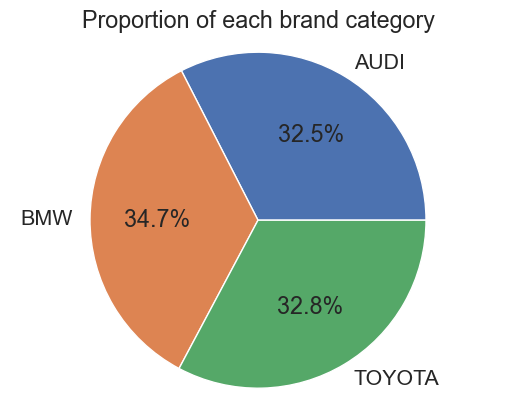

In [32]:
plt.pie(brandtrain_counts,
        explode=(0, 0, 0 ) ,
        labels=brand_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each brand category')
plt.show()

In [33]:
brandtrain_images = brandtrain_images / 255.0
brandtest_images = brandtest_images / 255.0

In [34]:
def display1_random_image(brand_names, images, labels):


    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + brand_names[labels[index]])
    plt.show()

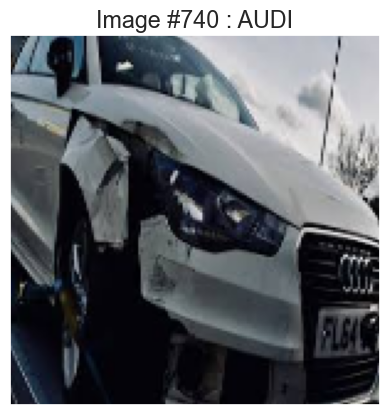

In [35]:
display1_random_image(brand_names, brandtrain_images, brandtrain_labels)

In [36]:
def display1_examples(brand_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(30):
        plt.subplot(6,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(brand_names[labels[i]])
    plt.show()

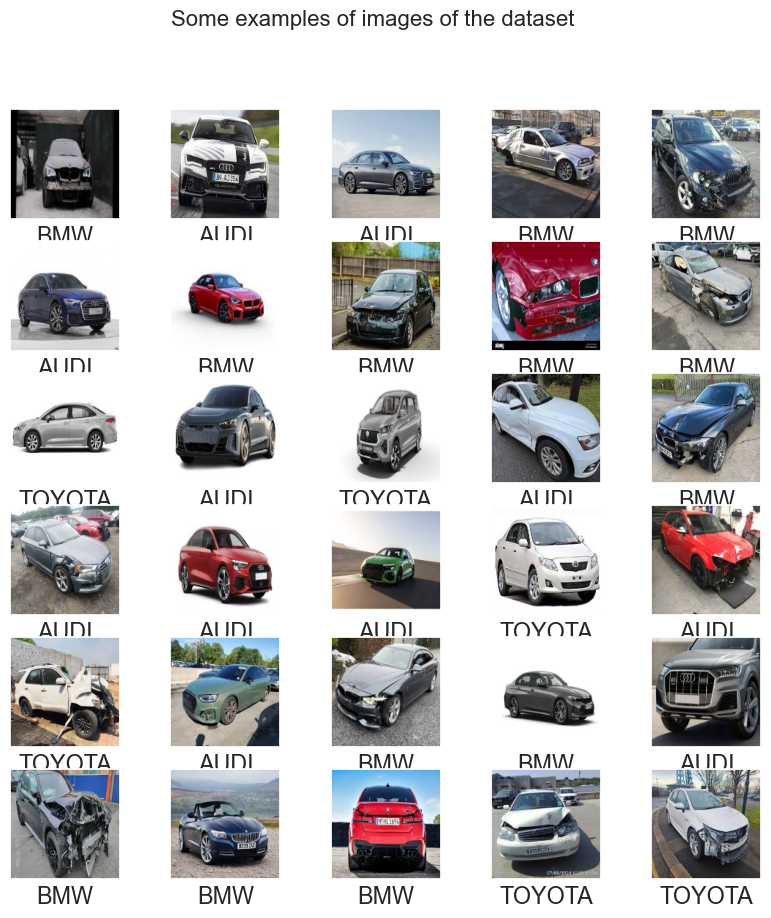

In [37]:
display1_examples(brand_names, brandtrain_images, brandtrain_labels)

In [38]:
cnn1_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

C:\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
cnn1_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 34, 34, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,183,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,203,651 (4.59 MB)

 Trainable params: 1,203,651 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
cnn1_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
r1 = cnn1_model.fit(brandtrain_images, brandtrain_labels, batch_size=125, epochs=40, validation_split = 0.2)

Epoch 1/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3254 - loss: 1.1294 - val_accuracy: 0.3333 - val_loss: 1.1011
Epoch 2/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3298 - loss: 1.1006 - val_accuracy: 0.3333 - val_loss: 1.0968
Epoch 3/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 845ms/step - accuracy: 0.3442 - loss: 1.0963 - val_accuracy: 0.3396 - val_loss: 1.0971
Epoch 4/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.3697 - loss: 1.0922 - val_accuracy: 0.3270 - val_loss: 1.0959
Epoch 5/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4761 - loss: 1.0883 - val_accuracy: 0.4151 - val_loss: 1.0894
Epoch 6/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 835ms/step - accuracy: 0.5511 - loss: 1.0682 - val_accuracy: 0.3711 - val_loss: 1.0810
Epoch 7/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5237 - loss: 1.0315 - val_accuracy: 0.3774 - val_loss: 1.1415
Epoch 8/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 856ms/step - accuracy: 0.5186 - loss: 1.0115 - val_accuracy: 0.4214 - val_loss: 1.0684
Epoch 

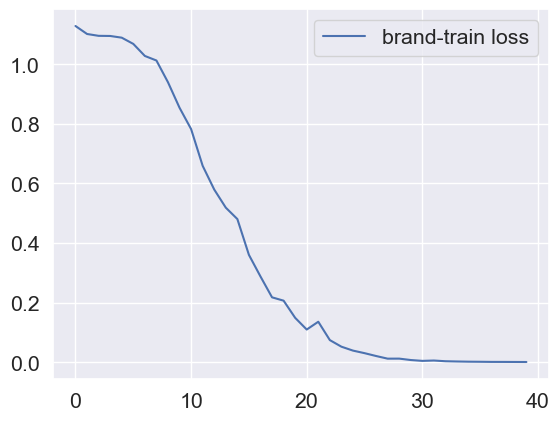

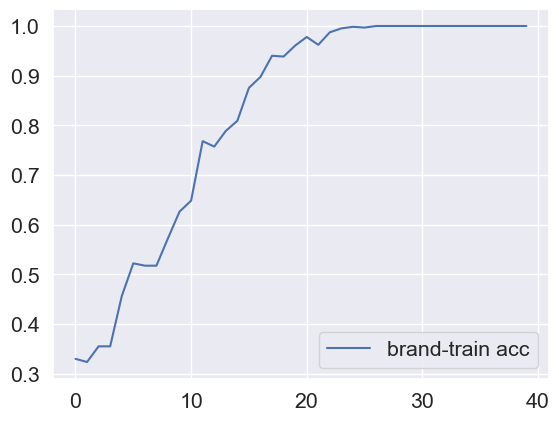

<Figure size 640x480 with 0 Axes>

In [42]:
# plot the loss
plt.plot(r1.history['loss'], label='brand-train loss')

plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r1.history['accuracy'], label='brand-train acc')

plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [43]:
brandtest_loss = cnn1_model.evaluate(brandtest_images, brandtest_labels)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8735 - loss: 0.8819


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
[0]
insurance: Based on the damaged for AUDI car insurance is $2500 to $3000


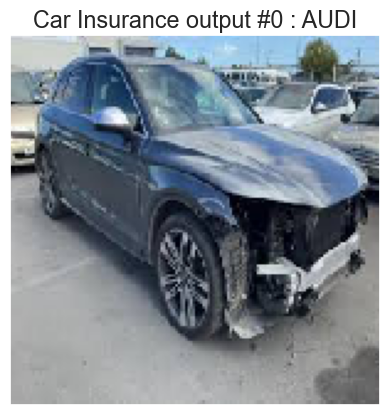

In [44]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
brandtest_image = image.load_img('C:/Users/badit/OneDrive/Documents/carinsurance-cnn-flask/brand_test/AUDI/18.jpeg', target_size = (150, 150))
brandtest_image = image.img_to_array(brandtest_image)
brandtest_image = np.expand_dims(brandtest_image, axis = 0)
predictions = cnn1_model.predict(brandtest_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
print(pred_labels )
brand_insurance()
index = np.random.randint(brandtest_image.shape[0])
plt.figure()
plt.imshow(brandtest_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Car Insurance output #{} : '.format(index) + brand_names[pred_labels[index]])
plt.show()

In [45]:
cnn1_model.save("model1.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import tensorflow as tf
from flask import Flask, render_template, request, send_from_directory
from keras.models import load_model

app = Flask(__name__)

UPLOAD_FOLDER = "uploads"
ALLOWED_EXTENSIONS = set(['png', 'PNG', 'jpg', 'JPG', 'jpeg', 'JPEG', 'gif', 'GIF'])
STATIC_FOLDER = "static"
#cnn_model = model_from_json(loaded_model_json)
# load weights into new model
#cnn_model.load_weights("model.weights.h5")
# Load model

from tensorflow import keras



# Set a secret key for session management
app.secret_key = 'your_secret_key'
# Now load the model
#cnn_model = load_model('model.h5')
#cnn_model.make_predict_function()

#cnn1_model = load_model('model1.h5')
#cnn1_model.make_predict_function()

IMAGE_SIZE = 150

# Preprocess an image
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image /= 255.0  # normalize to [0,1] range

    return image


# Read the image from path and preprocess
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)

    return preprocess_image(image)


# Predict & classify image
# Predict & classify image
def classify_damage(cnn_model, image_path):
    preprocessed_image = load_and_preprocess_image(image_path)
    preprocessed_image = tf.reshape(preprocessed_image, (1, IMAGE_SIZE, IMAGE_SIZE, 3))

    prob = cnn_model.predict(preprocessed_image)[0]
    print(prob)

    # Get the index of the maximum probability
    predicted_label_index = np.argmax(prob)

    # Mapping index to label name
    label_names = ['minor','moderate','severe','NORMAL']
    # Replace with your actual label names

    label = label_names[predicted_label_index]

    classified_prob = prob[predicted_label_index]

    return label, classified_prob

def classify_brand(cnn1_model, image_path):
    preprocessed_image = load_and_preprocess_image(image_path)
    preprocessed_image = tf.reshape(preprocessed_image, (1, IMAGE_SIZE, IMAGE_SIZE, 3))

    prob = cnn1_model.predict(preprocessed_image)[0]
    print(prob)

    # Get the index of the maximum probability
    predicted_label_index = np.argmax(prob)

    # Mapping index to label name
    label_names = ['AUDI','BMW','TOYOTA']
    # Replace with your actual label names

    label = label_names[predicted_label_index]

    classified_prob = prob[predicted_label_index]

    return label, classified_prob

users = {
    'user1': {'email': 'user1@example.com', 'password': 'password1'},
    'user2': {'email': 'user2@example.com', 'password': 'password2'}
}
# home page
@app.route("/")
def home():
    return render_template("home.html")
@app.route("/home_login")
def home_login():
    return render_template("home_login.html")
@app.route("/damage")
def damage():
    return render_template("damage.html")
@app.route("/damage1")
def damage1():
    return render_template("damage1.html")
@app.route("/brand")
def brand():
    return render_template("brand.html")
@app.route("/brand1")
def brand1():
    return render_template("brand1.html")

# Import Flask modules and other necessary libraries

# Your existing imports...
from flask import redirect, url_for, session

# Your existing code...

@app.route("/login", methods=["GET", "POST"])
def login():
    error = None
    if request.method == "POST":
        username = request.form['username']
        password = request.form['password']
        if username not in users:
            error = 'Invalid username'
        elif users[username]['password'] != password:
            error = 'Invalid password'
        else:
            # Redirect to the home page or any other page after successful login
            return redirect(url_for('home_login'))
    return render_template("login.html", error=error)

@app.route("/signup", methods=["GET", "POST"])
def signup():
    if request.method == "POST":
        username = request.form['username']
        email = request.form['email']
        password = request.form['password']
        # Add the new user to your user database (this is just a dummy example)
        users[username] = {'email': email, 'password': password}
        # Redirect to the login page after successful signup
        return redirect(url_for('login'))
    return render_template("signup.html")



@app.route("/classify_damage", methods=["POST", "GET"])
def upload_damage_file():

    if request.method == "GET":
        return render_template("damage.html")

    else:
        file = request.files["image"]
        upload_image_path = os.path.join(UPLOAD_FOLDER, file.filename)
        print(upload_image_path)
        file.save(upload_image_path)

        label, prob = classify_damage(cnn_model, upload_image_path)

        prob = round((prob * 100), 2)

    return render_template(
        "classify_damage.html", image_file_name=file.filename, label=label, prob=prob
    )

@app.route("/classify_brand", methods=["POST", "GET"])
def upload_brand_file():

    if request.method == "GET":
        return render_template("brand.html")

    else:
        file = request.files["image"]
        upload_image_path = os.path.join(UPLOAD_FOLDER, file.filename)
        print(upload_image_path)
        file.save(upload_image_path)

        label, prob = classify_brand(cnn1_model, upload_image_path)

        prob = round((prob * 100), 2)

    return render_template(
        "classify_brand.html", image_file_name=file.filename, label=label, prob=prob
    )

@app.route("/classify_damage1", methods=["POST", "GET"])
def upload_damage_file1():

    if request.method == "GET":
        return render_template("damage1.html")

    else:
        file = request.files["image"]
        upload_image_path = os.path.join(UPLOAD_FOLDER, file.filename)
        print(upload_image_path)
        file.save(upload_image_path)

        label, prob = classify_damage(cnn_model, upload_image_path)

        prob = round((prob * 100), 2)

    return render_template(
        "classify_damage1.html", image_file_name=file.filename, label=label, prob=prob
    )

@app.route("/classify_brand1", methods=["POST", "GET"])
def upload_brand_file1():

    if request.method == "GET":
        return render_template("brand1.html")

    else:
        file = request.files["image"]
        upload_image_path = os.path.join(UPLOAD_FOLDER, file.filename)
        print(upload_image_path)
        file.save(upload_image_path)

        label, prob = classify_brand(cnn1_model, upload_image_path)

        prob = round((prob * 100), 2)

    return render_template(
        "classify_brand1.html", image_file_name=file.filename, label=label, prob=prob
    )


@app.route("/classify_damage/<filename>")
def send_damage_file(filename):
    return send_from_directory(UPLOAD_FOLDER, filename)

@app.route("/classify_brand/<filename>")
def send_brand_file(filename):
    return send_from_directory(UPLOAD_FOLDER, filename)
@app.route("/classify_damage1/<filename>")
def send_damage_file1(filename):
    return send_from_directory(UPLOAD_FOLDER, filename)
@app.route("/classify_brand1/<filename>")
def send_brand_file1(filename):
    return send_from_directory(UPLOAD_FOLDER, filename)


if __name__ == "__main__":

    app.run()




 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:30:42] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:30:42] "GET /static/images/download.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:30:42] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:30:42] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:30:42] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:30:45] "GET /damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:30:45] "GET /static/images/download.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:30:45] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:30:45] "GET /static/images/bg.jpg HTT

uploads\0011.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:32:32] "POST /classify_damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:32:32] "GET /classify_damage/0011.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:32:32] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:32:32] "GET /static/script.js HTTP/1.1" 304 -


[2.6254554e-04 3.7750149e-01 5.9762901e-01 2.4606872e-02]


INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:32:44] "GET /damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:32:44] "GET /static/images/download.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:32:44] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:32:44] "GET /static/script.js HTTP/1.1" 304 -


uploads\0003.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:32:53] "POST /classify_damage HTTP/1.1" 200 -


[4.5491575e-12 5.6213878e-10 3.2202592e-05 9.9996781e-01]


INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:32:53] "GET /classify_damage/0003.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:32:53] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:32:53] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:32:56] "GET /damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:32:56] "GET /static/images/download.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:32:56] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:32:56] "GET /static/images/bg.jpg HTTP/1.1" 304 -


uploads\1b449d39f45b45e5b4250f3c54ff9e95_thb.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:33:19] "POST /classify_damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:33:19] "GET /classify_damage/1b449d39f45b45e5b4250f3c54ff9e95_thb.jpg HTTP/1.1" 200 -


[9.9976140e-01 2.2311224e-05 8.6501088e-05 1.2980832e-04]


INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:33:19] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:33:19] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:33:22] "GET /damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:33:22] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:33:22] "GET /static/images/download.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:33:22] "GET /static/script.js HTTP/1.1" 304 -


uploads\0002.JPEG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:10] "POST /classify_damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:10] "GET /classify_damage/0002.JPEG HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:10] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:10] "GET /static/images/bg.jpg HTTP/1.1" 304 -


[9.9987924e-01 2.2985798e-05 4.8665010e-05 4.9086186e-05]


INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:12] "GET /damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:12] "GET /static/images/download.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:12] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:12] "GET /static/images/bg.jpg HTTP/1.1" 304 -


uploads\0009.JPEG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:19] "POST /classify_damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:19] "GET /classify_damage/0009.JPEG HTTP/1.1" 200 -


[9.9979848e-01 7.6322962e-05 9.6535098e-07 1.2426256e-04]


INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:19] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:19] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:22] "GET /damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:22] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:22] "GET /static/images/download.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:22] "GET /static/script.js HTTP/1.1" 304 -


uploads\0006.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:32] "POST /classify_damage HTTP/1.1" 200 -


[3.9166989e-07 1.4158345e-10 2.2812342e-06 9.9999738e-01]


INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:32] "GET /classify_damage/0006.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:32] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:32] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:35] "GET /damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:36] "GET /static/images/download.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:36] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:36] "GET /static/images/bg.jpg HTTP/1.1" 304 -


uploads\0002.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[2.2019542e-09 1.8390063e-08 6.5695542e-07 9.9999928e-01]


INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:45] "POST /classify_damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:45] "GET /classify_damage/0002.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:45] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:45] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:51] "GET /damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:51] "GET /static/images/download.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:51] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:47:51] "GET /static/script.js HTTP/1.1" 304 -


uploads\0012.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:08] "POST /classify_damage HTTP/1.1" 200 -


[9.286178e-11 6.264050e-08 9.723474e-05 9.999026e-01]


INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:08] "GET /classify_damage/0012.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:08] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:08] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:09] "GET /damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:09] "GET /static/images/download.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:09] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:09] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:11] "GET /brand HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:11] "GET /static/images/bg.jpg HTTP/1.1" 304 -


uploads\2.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[1.7377164e-05 9.9997163e-01 1.0962673e-05]


INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:24] "POST /classify_brand HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:24] "GET /classify_brand/2.jpeg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:24] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:24] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:26] "GET /brand HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:26] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:30] "GET /damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:30] "GET /static/images/download.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:30] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:30] "GET /static/images/bg.jpg HTTP/1.1" 304 -


uploads\1b8f18c3429f44d4a712f655443fc5ec_thb.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:47] "POST /classify_damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:47] "GET /classify_damage/1b8f18c3429f44d4a712f655443fc5ec_thb.jpg HTTP/1.1" 200 -


[3.5722537e-03 9.9287593e-01 3.0416353e-03 5.1020941e-04]


INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:47] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:47] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:49] "GET /damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:49] "GET /static/images/download.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:49] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 09:48:49] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:43:43] "GET /brand HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:43:43] "GET /static/images/bg.jpg HTTP/1.1" 304 -


uploads\5.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:43:58] "POST /classify_brand HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:43:58] "GET /classify_brand/5.jpeg HTTP/1.1" 200 -


[1.759313e-09 9.999598e-01 4.011416e-05]


INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:43:59] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:43:59] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:44:06] "GET /brand HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:44:06] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:44:07] "GET /damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:44:07] "GET /static/images/download.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:44:07] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:44:07] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:44:13] "GET /brand HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:44:13] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:44:14] "GET /damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 -

uploads\0002.JPEG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:44:32] "POST /classify_damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:44:32] "GET /classify_damage/0002.JPEG HTTP/1.1" 200 -


[9.9987924e-01 2.2985798e-05 4.8665010e-05 4.9086186e-05]


INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:44:32] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:44:32] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:44:37] "GET /damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:44:37] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:44:37] "GET /static/images/download.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:44:37] "GET /static/script.js HTTP/1.1" 304 -


uploads\2fd5a7d45a7d4bce8c15f2f6c89a0494_thb.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:45:06] "POST /classify_damage HTTP/1.1" 200 -


[9.96518016e-01 1.34979055e-05 2.80542113e-03 6.63062034e-04]


INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:45:06] "GET /classify_damage/2fd5a7d45a7d4bce8c15f2f6c89a0494_thb.jpg HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:45:06] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:45:06] "GET /static/images/bg.jpg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:45:08] "GET /damage HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:45:08] "GET /static/images/download.jpeg HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:45:08] "GET /static/script.js HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [28/May/2024 10:45:08] "GET /static/images/bg.jpg HTTP/1.1" 304 -
